<a href="https://colab.research.google.com/github/Abuqami/Email-ClassificationNLP/blob/master/Email_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Email Spam Detection

In [ ]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 7.4 MB/s eta 0:00:00


In [ ]:
#importing libraries 
import pandas as pd
import nltk
import re
import nltk.corpus
from nltk.corpus import stopwords
from nltk import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import contractions
import string

## Exploring the dataset

In [ ]:
train = pd.read_csv('SMS_train.csv', encoding= 'unicode_escape')
test = pd.read_csv('SMS_test.csv', encoding= 'unicode_escape')

In [ ]:
train.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ï¿½ b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [ ]:
train['Label'].value_counts()

Non-Spam    835
Spam        122
Name: Label, dtype: int64

In [ ]:
df = pd.concat([train, test], axis = 0)
#combining the train and test datasets

In [ ]:
df['Label'].value_counts()

Non-Spam    884
Spam        198
Name: Label, dtype: int64

In [ ]:
df.rename(columns = {'S. No.':'index'}, inplace = True)

In [ ]:
#checking for missing values
df.isna().sum()

index           0
Message_body    0
Label           0
dtype: int64

## Dataset cleansing

In [ ]:

df.Message_body = df.Message_body.apply(lambda x : x.lower())
#text to lower case
df.Message_body = df.Message_body.apply(lambda x: re.sub('\w*\d\w*','', x))
#removing degits
df.Message_body = df.Message_body.apply(lambda x : contractions.fix(x))
#removing abbreviation and adding the full string for it
df.Message_body = [re.sub('\n', '', x) for x in df.Message_body]
#removing meaningless words
df.Message_body = df.Message_body.apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
#removing punctuations
df.Message_body = df.Message_body.apply(lambda x: re.sub(' +',' ',x))
#removing extra spaces
df.Message_body = df.Message_body.apply(lambda x: re.sub(r'(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?', '', x))
#remove all characters and emojies

In [ ]:
print('Email body after text noise removal : ')
df.Message_body

Email body after text noise removal : 


0                              rofl its true to its name
1      the guy did some bitching but i acted like i w...
2      pity was in mood for that soany other suggestions
3                     will  b going to esplanade fr home
4      this is the time we have tried contact you you...
                             ...                        
120     wonders in my world you you are style you are...
121    try to do something dear you read something fo...
122    sun ah thk mayb can if dun have anythin on thk...
123    symptoms when you are in love you like listeni...
124    great have a safe trip do not panic surrender all
Name: Message_body, Length: 1082, dtype: object

## Removing Stopwords and Lemmatization

In [ ]:
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df.Message_body = df.Message_body.apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
df.Message_body  = [re.sub('httpstco', '', x) for x in df.Message_body]

In [ ]:
df.Message_body 

0                                              rofl true
1      guy bitching act like interested buy week give...
2                             pity mood soany suggestion
3                                 b go esplanade fr home
4      time try contact win   pound prize claim easy ...
                             ...                        
120      wonder world style smile personality nature ...
121                                   try dear read exam
122    sun ah thk mayb dun anythin thk book e lesson ...
123     symptom love like listen song stop beloved angry
124                      great safe trip panic surrender
Name: Message_body, Length: 1082, dtype: object

In [ ]:
df.Message_body[45]

45    want tell bad feel basically time text lately ...
45    today voda number end select receive award mat...
Name: Message_body, dtype: object

## Visualizing the Words

Most common words in the dataset: 


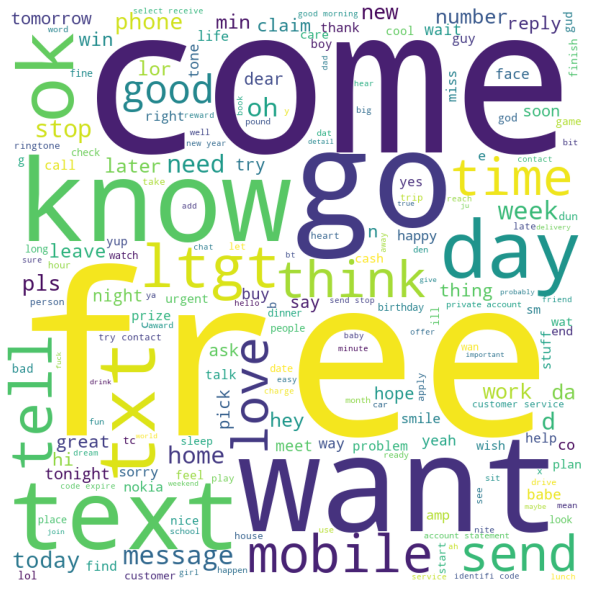

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

comment_words = ''
 
for x in df.Message_body :
    x = str(x)
    tokens = x.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
print('Most common words in the dataset: ')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
# interactive plots
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure(data=[go.Bar(x=df['Label'].value_counts().index,
                             y=df['Label'].value_counts().values)])

# Cutomize aspect
fig.update_traces(marker_color=px.colors.sequential.Plasma, 
                  marker_line_color="rgb(8, 48, 107)",
                  marker_line_width=1.5,
                  opacity=0.6)
# add title to the figure
fig.update_layout(template="plotly_dark", title_text="Spam vs Non-Spam Labels")
fig.show()

Imbalanced Labels = Biased model: <br>
The Non-spam examples are more than the spam example. To approach this problem regural accuracy metric won't be used. <br>
Instead, a balanced accuracy score will describe the model's performance better.

## Tokinazation

In [ ]:
import nltk
nltk.download('punkt')

def count_words(text):
    words = word_tokenize(text)
    return len(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df['count'] = df['Message_body'].apply(count_words)

In [ ]:
df['count'] 

0       2
1       9
2       4
3       5
4      10
       ..
120    12
121     4
122    16
123     8
124     5
Name: count, Length: 1082, dtype: int64

## Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer()
mssg = vectorizer.fit_transform(df['Message_body'])

In [ ]:
print(vectorizer.get_feature_names())

['aa', 'aah', 'abdoman', 'aberdeen', 'able', 'absolutely', 'abstract', 'ac', 'accent', 'access', 'accident', 'accidentally', 'accommodationvoucher', 'account', 'achanammarakheshqatar', 'aco', 'act', 'activity', 'actually', 'acw', 'ad', 'adam', 'add', 'addie', 'address', 'admin', 'admirer', 'admission', 'adore', 'adress', 'adrink', 'adsense', 'adult', 'adventure', 'advice', 'advise', 'advisor', 'afraid', 'africa', 'aft', 'afternoon', 'aftr', 'age', 'ago', 'ah', 'aha', 'ahhhhjust', 'ahmad', 'aight', 'airport', 'airtel', 'aiya', 'aiyah', 'aiyar', 'aiyo', 'ajith', 'akonlonely', 'al', 'alaikkumpride', 'albi', 'album', 'aletter', 'alex', 'alfie', 'algarve', 'alive', 'allah', 'alright', 'amazing', 'amnow', 'amp', 'amt', 'amuse', 'amy', 'andre', 'angry', 'animation', 'annoncement', 'announcement', 'ans', 'ansr', 'answer', 'antibiotic', 'anybody', 'anyone', 'anythiing', 'anythin', 'anytime', 'ap', 'apo', 'app', 'apparently', 'applebee', 'apply', 'approve', 'appy', 'aproach', 'aquarius', 'arcade

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Splitting X and y into trainning and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( mssg, df['Label'], test_size=0.3,random_state = 0)

## Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score

scores_list = []

model= MultinomialNB()
model.fit(x_train,y_train)
pred_y = model.predict(x_test)
acc = balanced_accuracy_score(y_test, pred_y)
print('Balanced accuracy:' , acc)
print(classification_report(y_test, pred_y))
scores_list.append(acc)


Balanced accuracy: 0.9205446105072463
              precision    recall  f1-score   support

    Non-Spam       0.97      0.96      0.96       256
        Spam       0.85      0.88      0.87        69

    accuracy                           0.94       325
   macro avg       0.91      0.92      0.91       325
weighted avg       0.94      0.94      0.94       325



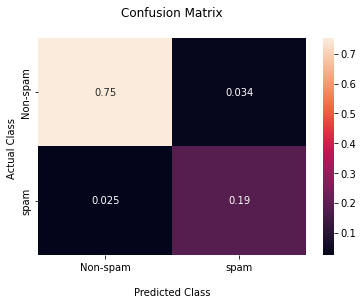

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
cm = confusion_matrix(y_test, pred_y)
cm_fig = sns.heatmap(cm/np.sum(cm), annot=True)
cm_fig.set_title('Confusion Matrix\n')
cm_fig.set_xlabel('\nPredicted Class')
cm_fig.set_ylabel('Actual Class ')
cm_fig.xaxis.set_ticklabels(['Non-spam','spam'])
cm_fig.yaxis.set_ticklabels(['Non-spam','spam'])

plt.show()

## Support Vector Machines

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC(C=100) 
svc.fit(x_train,y_train)
pred_y = svc.predict(x_test)
acc = balanced_accuracy_score(y_test, pred_y)
print('Balanced accuracy:' , acc)
print(classification_report(y_test,pred_y))
scores_list.append(acc)

Balanced accuracy: 0.8096410778985508
              precision    recall  f1-score   support

    Non-Spam       0.91      1.00      0.95       256
        Spam       0.98      0.62      0.76        69

    accuracy                           0.92       325
   macro avg       0.94      0.81      0.86       325
weighted avg       0.92      0.92      0.91       325



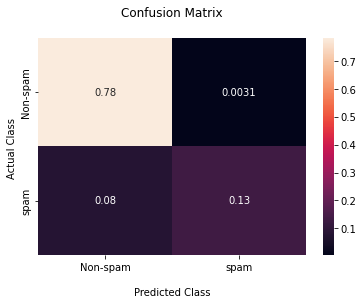

In [ ]:

cm = confusion_matrix(y_test, pred_y)
cm_fig = sns.heatmap(cm/np.sum(cm), annot=True)
cm_fig.set_title('Confusion Matrix\n')
cm_fig.set_xlabel('\nPredicted Class')
cm_fig.set_ylabel('Actual Class ')
cm_fig.xaxis.set_ticklabels(['Non-spam','spam'])
cm_fig.yaxis.set_ticklabels(['Non-spam','spam'])

plt.show()

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


dt = DecisionTreeClassifier(class_weight = {'Non-Spam':0.6,'Spam':0.8})
dt.fit(x_train, y_train)
pred_y = dt.predict(x_test)
acc = balanced_accuracy_score(y_test, pred_y)
print('Balanced accuracy:' , acc)
print(classification_report(y_test,pred_y))
scores_list.append(acc)

Balanced accuracy: 0.8533740942028986
              precision    recall  f1-score   support

    Non-Spam       0.93      0.95      0.94       256
        Spam       0.81      0.75      0.78        69

    accuracy                           0.91       325
   macro avg       0.87      0.85      0.86       325
weighted avg       0.91      0.91      0.91       325



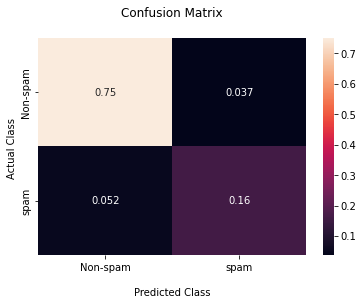

In [ ]:

cm = confusion_matrix(y_test, pred_y)
cm_fig = sns.heatmap(cm/np.sum(cm), annot=True)
cm_fig.set_title('Confusion Matrix\n')
cm_fig.set_xlabel('\nPredicted Class')
cm_fig.set_ylabel('Actual Class ')
cm_fig.xaxis.set_ticklabels(['Non-spam','spam'])
cm_fig.yaxis.set_ticklabels(['Non-spam','spam'])

plt.show()

## Bagging Classifier


In [ ]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(n_estimators = 100)
model.fit(x_train,y_train)
pred_y = model.predict(x_test)
acc = balanced_accuracy_score(y_test, pred_y)
print('Balanced accuracy:' , acc)
print(classification_report(y_test,pred_y))
scores_list.append(acc)

Balanced accuracy: 0.8887850996376812
              precision    recall  f1-score   support

    Non-Spam       0.95      0.98      0.96       256
        Spam       0.92      0.80      0.85        69

    accuracy                           0.94       325
   macro avg       0.93      0.89      0.91       325
weighted avg       0.94      0.94      0.94       325



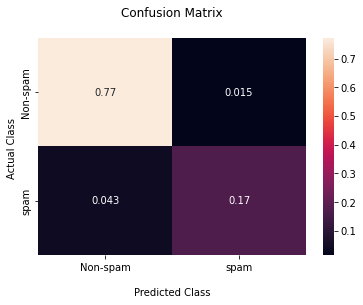

In [ ]:

cm = confusion_matrix(y_test, pred_y)
cm_fig = sns.heatmap(cm/np.sum(cm), annot=True)
cm_fig.set_title('Confusion Matrix\n')
cm_fig.set_xlabel('\nPredicted Class')
cm_fig.set_ylabel('Actual Class ')
cm_fig.xaxis.set_ticklabels(['Non-spam','spam'])
cm_fig.yaxis.set_ticklabels(['Non-spam','spam'])

plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(n_estimators=500)
model.fit(x_train,y_train)
pred_y = model.predict(x_test)
acc = balanced_accuracy_score(y_test, pred_y)
print('Balanced accuracy:' , acc)
print(classification_report(y_test,pred_y))
scores_list.append(acc)

Balanced accuracy: 0.7951483242753623
              precision    recall  f1-score   support

    Non-Spam       0.90      1.00      0.95       256
        Spam       0.98      0.59      0.74        69

    accuracy                           0.91       325
   macro avg       0.94      0.80      0.84       325
weighted avg       0.92      0.91      0.90       325



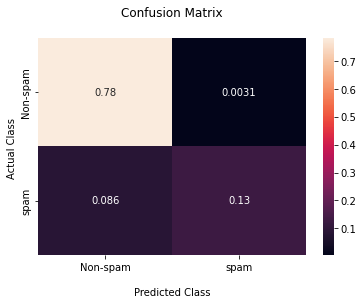

In [ ]:

cm = confusion_matrix(y_test, pred_y)
cm_fig = sns.heatmap(cm/np.sum(cm), annot=True)
cm_fig.set_title('Confusion Matrix\n')
cm_fig.set_xlabel('\nPredicted Class')
cm_fig.set_ylabel('Actual Class ')
cm_fig.xaxis.set_ticklabels(['Non-spam','spam'])
cm_fig.yaxis.set_ticklabels(['Non-spam','spam'])

plt.show()

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100)
clf.fit(x_train,y_train)
pred_y = clf.predict(x_test)
acc = balanced_accuracy_score(y_test, pred_y)
print('Balanced accuracy:' , acc)
print(classification_report(y_test,pred_y))
scores_list.append(acc)

Balanced accuracy: 0.8935122282608696
              precision    recall  f1-score   support

    Non-Spam       0.95      0.96      0.96       256
        Spam       0.85      0.83      0.84        69

    accuracy                           0.93       325
   macro avg       0.90      0.89      0.90       325
weighted avg       0.93      0.93      0.93       325



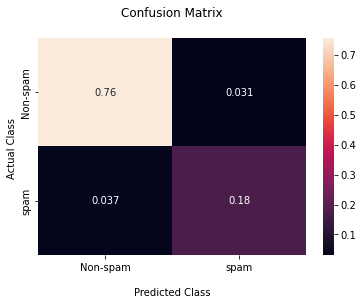

In [ ]:

cm = confusion_matrix(y_test, pred_y)
cm_fig = sns.heatmap(cm/np.sum(cm), annot=True)
cm_fig.set_title('Confusion Matrix\n')
cm_fig.set_xlabel('\nPredicted Class')
cm_fig.set_ylabel('Actual Class ')
cm_fig.xaxis.set_ticklabels(['Non-spam','spam'])
cm_fig.yaxis.set_ticklabels(['Non-spam','spam'])

plt.show()

## Adaboost with Decision Tree

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(
    DecisionTreeClassifier(),
    n_estimators = 100,
    learning_rate = 0.1,
    algorithm = "SAMME",
    )
ada.fit(x_train,y_train)
pred_y = ada.predict(x_test)

acc = balanced_accuracy_score(y_test, pred_y)
print('Balanced accuracy:' , acc)
print(classification_report(y_test,pred_y))
scores_list.append(acc)

Balanced accuracy: 0.8422214673913043
              precision    recall  f1-score   support

    Non-Spam       0.93      0.95      0.94       256
        Spam       0.78      0.74      0.76        69

    accuracy                           0.90       325
   macro avg       0.86      0.84      0.85       325
weighted avg       0.90      0.90      0.90       325



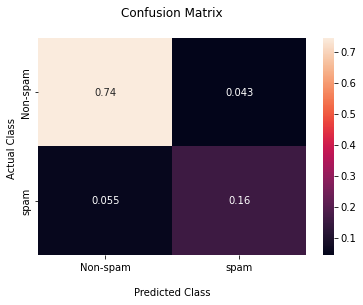

In [ ]:

cm = confusion_matrix(y_test, pred_y)
cm_fig = sns.heatmap(cm/np.sum(cm), annot=True)
cm_fig.set_title('Confusion Matrix\n')
cm_fig.set_xlabel('\nPredicted Class')
cm_fig.set_ylabel('Actual Class ')
cm_fig.xaxis.set_ticklabels(['Non-spam','spam'])
cm_fig.yaxis.set_ticklabels(['Non-spam','spam'])

plt.show()

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100)
gbc.fit(x_train,y_train)
pred_y = gbc.predict(x_test)
acc = balanced_accuracy_score(y_test, pred_y)
print('Balanced accuracy:' , acc)
print(classification_report(y_test,pred_y))
scores_list.append(acc)

Balanced accuracy: 0.8347203351449275
              precision    recall  f1-score   support

    Non-Spam       0.92      0.99      0.95       256
        Spam       0.94      0.68      0.79        69

    accuracy                           0.92       325
   macro avg       0.93      0.83      0.87       325
weighted avg       0.92      0.92      0.92       325



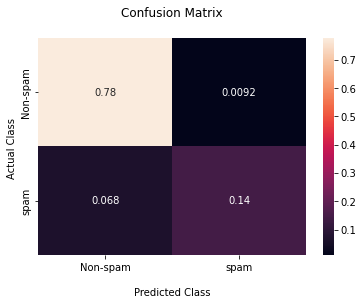

In [ ]:

cm = confusion_matrix(y_test, pred_y)
cm_fig = sns.heatmap(cm/np.sum(cm), annot=True)
cm_fig.set_title('Confusion Matrix\n')
cm_fig.set_xlabel('\nPredicted Class')
cm_fig.set_ylabel('Actual Class ')
cm_fig.xaxis.set_ticklabels(['Non-spam','spam'])
cm_fig.yaxis.set_ticklabels(['Non-spam','spam'])

plt.show()

## Extremly Randomized Tree

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators = 300,
                             class_weight ='balanced')
model.fit(x_train,y_train)
pred_y = model.predict(x_test)
acc = balanced_accuracy_score(y_test, pred_y)
print('Balanced accuracy:' , acc)
print(classification_report(y_test,pred_y))
scores_list.append(acc)

Balanced accuracy: 0.8366734601449275
              precision    recall  f1-score   support

    Non-Spam       0.92      0.99      0.95       256
        Spam       0.96      0.68      0.80        69

    accuracy                           0.93       325
   macro avg       0.94      0.84      0.88       325
weighted avg       0.93      0.93      0.92       325



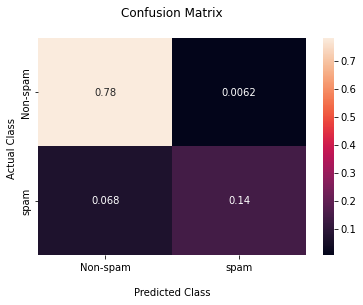

In [ ]:

cm = confusion_matrix(y_test, pred_y)
cm_fig = sns.heatmap(cm/np.sum(cm), annot=True)
cm_fig.set_title('Confusion Matrix\n')
cm_fig.set_xlabel('\nPredicted Class')
cm_fig.set_ylabel('Actual Class ')
cm_fig.xaxis.set_ticklabels(['Non-spam','spam'])
cm_fig.yaxis.set_ticklabels(['Non-spam','spam'])

plt.show()

In [ ]:
import plotly.express as px
models_score = [['RF', round(scores_list[4], 2) * 100],
                ['SVC', round(scores_list[1], 2) * 100],
                ['Extra trees', round(scores_list[8], 2) * 100],
                ['GB', round(scores_list[7], 2) * 100],
                ['DT', round(scores_list[2], 2) * 100],
                ['Ada with DT', round(scores_list[6], 2) * 100],
                ['Bagging', round(scores_list[3], 2) * 100],
                ['Ada', round(scores_list[5], 2) * 100],
                ['Naive Bayes', round(scores_list[0], 2) * 100]]


scores = np.array(models_score)
frame = pd.DataFrame(scores)
frame



,0,1
0,RF,80.0
1,SVC,81.0
2,Extra trees,84.0
3,GB,83.0
4,DT,85.0
5,Ada with DT,84.0
6,Bagging,89.0
7,Ada,89.0
8,Naive Bayes,92.0


In [ ]:
sc_frame = pd.DataFrame(scores, columns = ['Model','Score'])
fig = px.scatter(sc_frame, x="Model", y="Score")

fig.show()

## Cross-validation

Conducting a cross-val using the whole dataset with Naive Bayes algorithm

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from numpy import mean
from numpy import std


model= MultinomialNB()
#cross validation with 10 k-folds
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, mssg, df['Label'] ,scoring='balanced_accuracy', cv=cv, n_jobs=-1)

print('Balanced accuracy scores: %.3f (%.3f)' % (mean(scores), std(scores)))

Balanced accuracy scores: 0.953 (0.032)


In [ ]:
scores

array([0.96652542, 0.95251595, 0.92840983, 0.96756979, 0.95684394])

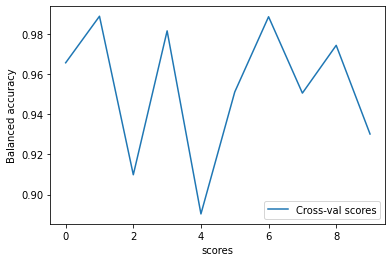

In [ ]:
plt.figure()
plt.xlabel("scores")
plt.ylabel("Balanced accuracy")
plt.plot(
    scores,
)

plt.legend(["Cross-val scores"], loc ="lower right")
plt.show()

## Conclusion 

You should write your conclusion here, summraize the problem and the algorithm that got the highest accuracy score.